# ChiSquare Class

The `ChiSquare` Class within SORA was created to control the $\chi^2$ minimization tests and obtain the best fit values and uncertainties. Here we have some useful tasks that allows the user to get the best value and uncertainty within a sigma uncertainty value, plot and save the values. The documentation <a href=https://sora.readthedocs.io/>here</a> contains the details about every step.  

This Jupyter-Notebook was designed as a tutorial for how to work with the `ChiSquare` Object Class. Any further question, please contact the core team: Altair Ramos Gomes Júnior, Bruno Eduardo Morgado, Gustavo Benedetti Rossi, and Rodrigo Carlos Boufleur.

**The** `ChiSquare` **Docstring was designed to help the users. Also, each function has its Docstring containing its main purpose and the needed parameters (physical description and formats). Please, do not hesitate to use it.**

## 0. Index

1. [Instantiating the ChiSquare Object](#section_1)

2. [Viewing and saving the results](#section_2)

3. [Saving the results and plots](#section_3)

In [1]:
## SORA package
from sora.extra import ChiSquare

## Usual packages
import numpy as np
import matplotlib.pyplot as pl

SORA version: 1.0dev


<a id="section_1"></a>

## 1. Instantiating a ChiSquare Object

The `ChiSquare` Class was not created to be instantiated by the user. Its main function is to control the fitting process and it will be resulting of the fitting tasks, such as `LightCurve.occ_lcfit()` and `Occultation.fit_ellipse()`. This Object contains a python dictionary with the $\chi^2$ values and the associated tested parameters.

In [2]:
ChiSquare?

Init signature: ChiSquare(chi2, npts, **kwargs)
Docstring:     
Stores the arrays for all inputs and given chi-square.

Parameters
----------
chi2 : `array`
    Array with all the chi-square values.

npts : `int`
    Number of points used in the fit.

**kwargs
    Any other given input must be an array with the same size as chi2. The
    keyword `name` will be associated as the variable `name` of the given data.

Example
-------
>>> chisquare = ChiSquare(chi2, immersion=t1, emersion=t2)

``t1`` and ``t2`` must be an array with the same size as chi2.

The data can be accessed as

>>> chisquare.data['immersion']
File:           ~/miniconda3/envs/sora-develop-stats/lib/python3.9/site-packages/sora_astro-1.0.dev0-py3.9.egg/sora/extra/chisquare.py
Type:           type
Subclasses:     


In [3]:
chi2, t_immersion, t_emersion = np.loadtxt('input/ascii/example_chi2.dat',unpack=True)

chisquare = ChiSquare(chi2=chi2, npts=496, t_immersion=t_immersion, t_emersion=t_emersion)

<a id="section_2"></a>

## 2. Viewing the results

First, the value that minimizes the $\chi^2$ can be obtained using the `ChiSquare.get_values()`.

In [4]:
chisquare.get_values()

{'t_immersion': 76880.33436, 't_emersion': 76890.34416}

**All the values within a sigma limit can be found in a similar manner**

In [5]:
chisquare.get_values(sigma=3)

{'t_immersion': array([76880.37133, 76880.28921, 76880.24912, ..., 76880.29041,
        76880.39328, 76880.43463]),
 't_emersion': array([76890.26501, 76890.25714, 76890.37106, ..., 76890.42023,
        76890.4073 , 76890.36891])}

**The best-fitted value and its uncertainties can be obtained using** `ChiSquare.get_nsigma()`

In [6]:
chisquare.get_nsigma()

{'chi2_min': 489.84066,
 'sigma': 1,
 'n_points': 137,
 't_immersion': [76880.32901, 0.028059999996912666],
 't_emersion': [76890.34104, 0.03118999999423977]}

In [7]:
chisquare.get_nsigma(sigma=3)

{'chi2_min': 489.84066,
 'sigma': 3,
 'n_points': 1719,
 't_immersion': [76880.36540000001, 0.13475000000471482],
 't_emersion': [76890.34015999999, 0.10841999999684049]}

**Also, the number of fitted points (N) and the number of fitted parameters (P) can be obtained using** `ChiSquare.npts` **and** `ChiSquare.nparam`

In [8]:
print('Number of fitted points: {}'.format(chisquare.npts))
print('Number of fitted parameters: {}'.format(chisquare.nparam))

Number of fitted points: 496
Number of fitted parameters: 2


<a id="section_3"></a>

## 3. Saving the results and plots

The plot with the $\chi^2$ by fitted parameter can be seen using `ChiSquare.plot_chi2()`

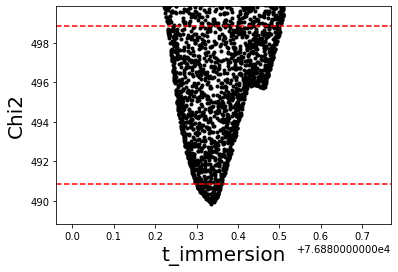

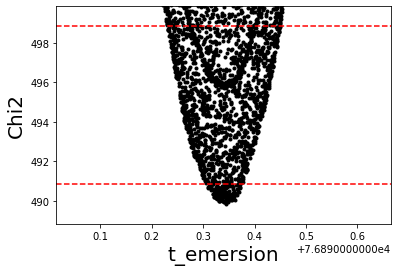

In [9]:
chisquare.plot_chi2()

**If the user choose to plot only one, it is possible to have complete control over it using** _matplotlib_ **functions**

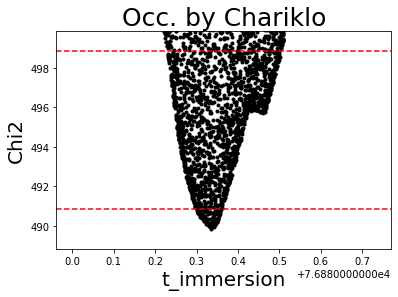

In [10]:
chisquare.plot_chi2('t_immersion')

pl.title('Occ. by Chariklo',fontsize=25)
pl.show()

**The values within the** `ChiSquare` **object can be saved as an ASCII file using** `ChiSquare.to_file()`

In [11]:
chisquare.to_file('output/example_chi2.dat')

**Two** `ChiSquare` **objects can be easily combined by adding them**

In [12]:
chisquare_2 = chisquare + chisquare

print('Single ChiSquare:  ',len(chisquare.data['chi2']))
print('Combined ChiSquare:',len(chisquare_2.data['chi2']))

Single ChiSquare:   10000
Combined ChiSquare: 20000


**This Jupyter-Notebook was designed as a tutorial for how to work with the** `ChiSquare` **Class. More information about the other classes, please refer to their specif Jupyter-Notebook. Any further question, please contact the core team: Altair Ramos Gomes Júnior, Bruno Eduardo Morgado, Gustavo Benedetti Rossi, and Rodrigo Carlos Boufleur.**

**The End**